In [75]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
from scipy.optimize import curve_fit
import math
import numba as nb
from testing_sample import *

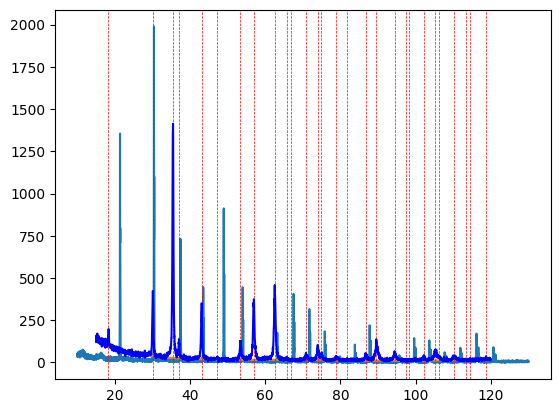

3
[192, 423, 1365, 138, 305, 29, 127, 328, 454, 18, 10, 45, 104, 56, 38, 21, 38, 127, 55, 3, 14, 16, 55, 35, 29, 19, 16, 37]
[  98.  451.  611.  660.  839.  962. 1149. 1255. 1422. 1518. 1550. 1674.
 1764. 1794. 1913. 2001. 2146. 2232. 2377. 2464. 2493. 2610. 2699. 2729.
 2851. 2944. 2976. 3105.]
14362
[ 10.00417782  10.01253287  10.02088793 ... 129.97438019 129.98273524
 129.9910903 ]
0.008355052745439906
0.03341190060789323
3142


In [76]:
f = Data_file(0)
f.read_data()
f.read_data_of_hkl()

#aparature_data
ap = Data_file(-1)
ap.read_data()
plt.plot(ap.x,ap.counts)
plt.plot(f.x,f.counts_bac)
# plot_sample__bac(counts,counts_bac,name,theta_start,theta_stop,True)
# checking_part_of_plot(counts,theta_start,theta_stop,f.two_theta)
f.find_counts_of_peaks()

peak_count = part_of_plot(f.counts,f.two_theta_x_index,f.x)
print(min(peak_count))
print(peak_count)
print(f.two_theta_x_index)
print(len(ap.x))
print(ap.x)
print(ap.x[1]-ap.x[0])
print(f.x[1]-f.x[0])
print(len(f.x))


15.00311127 119.94989107939264
10.00417782 129.9910902972625


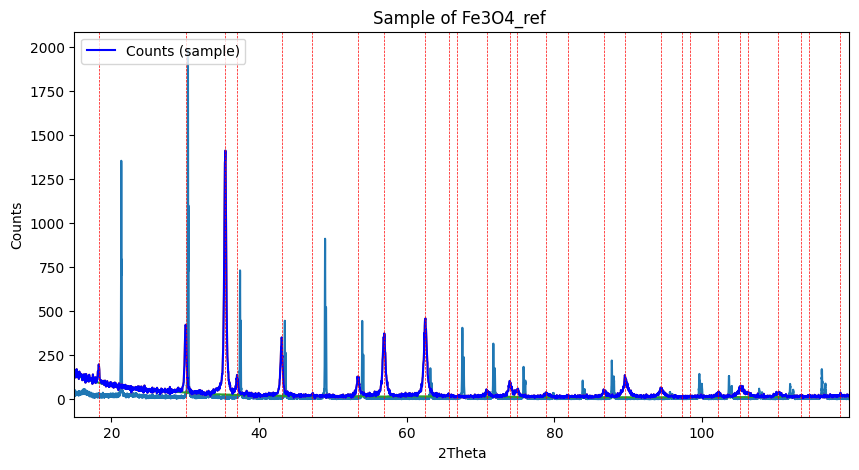

15.000499361773064
119.94831689724371


In [77]:
plt.figure(figsize=(10, 5))
plt.plot(ap.x,ap.counts)
plt.plot(f.x,f.counts)
plt.xlim(f.x[0],f.x[-1])
print(f.x[0],f.x[-1])
print(ap.x[0],ap.x[-1])
plt.plot(f.x,f.counts_bac)
plot_with_theta_sample(f.counts,f.name,f.two_theta,f.x)
eps = 0.5*ap.step
b = False
c = False
for i in range(len(ap.x)):
    if abs(ap.x[i] - f.x[0])<eps:
        print(ap.x[i]) 
    if abs(ap.x[i] - f.x[-1])<eps:
        print(ap.x[i])


In [84]:

only_counts = delete_bac(f.counts,f.counts_bac)


f.delete_aparature(ap.counts,ap.x,ap.step)


# plot_sample__bac(only_counts,counts_bac,name,theta_start,theta_stop,False)
plot_with_theta_sample(only_counts,f.name,f.two_theta,f.x)
plot_with_theta_sample(f.without_aparature_counts,f.name,f.two_theta,f.x)
# checking_part_of_plot(only_counts,theta_start,theta_stop,two_theta,100)



AttributeError: 'Data_file' object has no attribute 'delete_aparature'

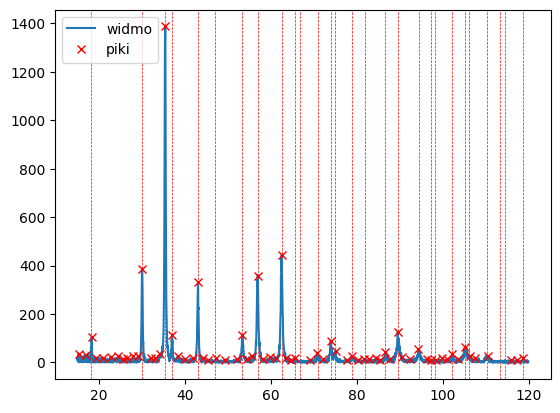

69
[np.float64(15.303818375471039), np.float64(17.007825306473592), np.float64(18.31088943018143), np.float64(19.4468940508498), np.float64(21.050665280028674), np.float64(22.721260310423336), np.float64(24.492091042641675), np.float64(25.56127186209426), np.float64(26.59704078093895), np.float64(27.93351680525468), np.float64(29.06952142592305), np.float64(30.071878444159847), np.float64(32.04318058002555), np.float64(33.179185200693915), np.float64(34.281777920754394), np.float64(35.451194442030655), np.float64(37.021553770601635), np.float64(38.324617894309476), np.float64(39.96180102409624), np.float64(41.933103159961945), np.float64(43.06910778063031), np.float64(44.27193620251447), np.float64(45.40794082318284), np.float64(47.279007257224855), np.float64(49.45078079673792), np.float64(52.05690904415359), np.float64(53.32656126725353), np.float64(54.36233018609823), np.float64(55.66539430980606), np.float64(56.968458433513895), np.float64(58.238110656613834), np.float64(59.8418818

In [79]:
# wykrywanie pików


from scipy.signal import find_peaks
peaks, dict = find_peaks(only_counts, height=10, distance=30)

for i in range(len(f.two_theta)):
        plt.axvline(f.two_theta[i], color='red', linestyle='--', linewidth=0.5)
plt.plot(f.x, only_counts, label='widmo')
plt.plot(f.x[peaks], only_counts[peaks], 'rx', label='piki')
plt.legend()
plt.show()
p,c=[],[]
print(len(peaks))
for i in peaks:
    p.append(f.x[i])
print(p)
print(f.two_theta)
print(len(f.two_theta))
print(dict)
# for i in two_theta:
#     c.append(only_counts[])
# print(c)

In [80]:
max_count_difference = []
ind = []
for i in range(len(only_counts)-1):
    if abs(only_counts[i]-only_counts[i+1])>50:
        max_count_difference.append(abs(only_counts[i]-only_counts[i+1]))
        ind.append(i)

print(max_count_difference)
print(ind)
print(f.x[ind])

[np.float64(68.0), np.float64(86.0), np.float64(54.0), np.float64(79.0), np.float64(52.0), np.float64(52.0), np.float64(52.0), np.float64(100.0), np.float64(89.0), np.float64(125.0), np.float64(229.0), np.float64(175.0), np.float64(178.0), np.float64(153.0), np.float64(80.0), np.float64(275.0), np.float64(159.0), np.float64(212.0), np.float64(156.0), np.float64(136.0), np.float64(79.0), np.float64(70.0), np.float64(52.0), np.float64(100.0), np.float64(52.0), np.float64(52.0), np.float64(55.0), np.float64(54.0), np.float64(107.0), np.float64(73.0), np.float64(64.0), np.float64(56.0), np.float64(66.0)]
[446, 447, 453, 454, 455, 600, 601, 603, 604, 605, 606, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 833, 841, 844, 1248, 1258, 1261, 1417, 1419, 1423, 1428, 1431]
[29.90481894 29.93823084 30.13870225 30.17211415 30.20552605 35.05025163
 35.08366354 35.15048734 35.18389924 35.21731114 35.25072304 35.28413494
 35.31754684 35.35095874 35.45119444 35.48460634 35.51801824 35.55143014

In [81]:
he = [10,20,25,30]
hei = [2,4,6,8,10]
# di = [5,10,15,20,25,30,35,40,45,50]
# pr = [f+0.01 for f in range(1,20)]
# l,r2,w = [],[],[]
    # for j in range(len(di)):
    #     for k in range(len(pr)):
peak_detect(without_aparature_counts,f.x,he[0],50,0.2,f.two_theta,4,f.theta_start,f.step)
# peak_detect(without_aparature_counts,he[0],40,0.2,f.two_theta)

# peak_detect(without_aparature_counts,he[1],50,0.2,f.two_theta)
# peak_detect(without_aparature_counts,he[2],50,0.2,f.two_theta)
# peak_detect(without_aparature_counts,he[3],50,0.2,f.two_theta)
# peak_detect(without_aparature_counts,hei[0],50,0.2,f.two_theta)
# peak_detect(without_aparature_counts,hei[1],50,0.2,f.two_theta)
# peak_detect(without_aparature_counts,hei[2],50,0.2,f.two_theta)
# peak_detect(without_aparature_counts,hei[3],50,0.2,f.two_theta)
#     l.append(li)
#     r2.append(r2_)
#     w.append(wy)
# print(l)
# print(r2)
# print(w)
        

Znaleziono 28 pików. R^2 dopasowania: 0.9901,wydajność = 1.0
Znaleziono 28 pików. R^2 dopasowania: 0.9901,wydajność = 0.6428571428571429,eps = 4


In [82]:
# he = [f+2 for f in range(1,20)]
# di = [5,10,15,20,25,30,35,40,45,50]
# pr = [f+0.01 for f in range(1,20)]
# l,r2,w = [],[],[]
# for i in range(len(he)):
#     # for j in range(len(di)):
#     #     for k in range(len(pr)):
#     li,r2_,wy = peak_detect(without_aparature_counts,he[i],50,0.2,f.two_theta)
#     l.append(li)
#     r2.append(r2_)
#     w.append(wy)
# print(l)
# print(r2)
# print(w)
        

In [83]:
# # --- Funkcje pomocnicze ---
# def gaussian(x, A, x0, sigma):
#     """Pojedyncza funkcja Gaussa."""
#     return A * np.exp(-0.5 * ((x - x0) / sigma) ** 2)

# def multi_gaussian(x, *params):
#     """Suma wielu funkcji Gaussa."""
#     y = np.zeros_like(x)
#     n = len(params) // 3
#     for i in range(n):
#         A = params[3*i]
#         x0 = params[3*i+1]
#         sigma = params[3*i+2]
#         y += gaussian(x, A, x0, sigma)
#     return y

# # --- Dane wejściowe ---
# # Załóżmy, że masz dane XRD: only_counts, theta_start, theta_stop
# # (theta_start, theta_stop np. 10–90°, only_counts np. tablica intensywności)
# step = len(only_counts)
# N = ((theta_stop - theta_start) / step)
# x = np.arange(theta_start, theta_stop, N)

# # --- Detekcja pików ---
# peaks, props = find_peaks(only_counts, height=2.5, distance=30, prominence=0.2)
# peaks2, props2 = find_peaks(only_counts, height=2.5, distance=30, prominence=0.2)


# for i in range(len(peaks)):
#     plt.axvline(peaks[i])
# for i in range(len(two_theta)):
#     plt.axvline((two_theta[i]-theta_start)/N, color='red', linestyle='--', linewidth=0.5)
# plt.plot(only_counts,color='green')
# plt.xlabel('2θ [°]')
# plt.ylabel('Intensywność')
# plt.legend(fontsize=8)
# plt.tight_layout()
# plt.show()
# for i in range(len(peaks2)):
#     plt.axvline(peaks2[i])
# for i in range(len(two_theta)):
#     plt.axvline((two_theta[i]-theta_start)/N, color='red', linestyle='--', linewidth=0.5)
# plt.plot(counts,color='green')
# plt.xlabel('2θ [°]')
# plt.ylabel('Intensywność')
# plt.legend(fontsize=8)
# plt.tight_layout()
# plt.show()

# print(len(peaks))
# print(len(peaks2))



# for p in peaks:
#     # wybór danych wokół piku
#     left = max(p - 30, 0)
#     right = min(p + 30, len(x))
#     x_fit = x[left:right]
#     y_fit = only_counts[left:right]

#     # szacunki początkowe parametrów (A, x0, sigma)
#     A0 = only_counts[p]
#     x0_0 = x[p]
#     sigma0 = (x[right] - x[left]) / 6 #0.1  # np. 0.1° – zależnie od kroku

#     # dopasowanie krzywej Gaussa
#     popt, pcov = curve_fit(gaussian, x_fit, y_fit, p0=[A0, x0_0, sigma0],maxfev = 1000)

#     # wyniki
#     A_fit, x0_fit, sigma_fit = popt
#     print(f"Pik przy 2θ = {x0_fit:.2f}°, A = {A_fit:.1f}, σ = {sigma_fit:.3f}")

#     # narysuj dopasowanie
#     plt.plot(x_fit, y_fit, 'b.', label='Dane')
#     plt.plot(x_fit, gaussian(x_fit, *popt), 'r-', label='Gauss')
#     plt.legend()
#     plt.xlabel('2θ [°]')
#     plt.ylabel('Intensywność')
#     plt.show()
